In [1]:
!pip install pinecone-client
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.5/214.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 12.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 214.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 23.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
!pip install moviepy
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 8.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 142.4 MB/s eta 0:00:0000:0100:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110721 sha256=58e41a4950b3218d30dee833cac2c67fba86331a27e9ccdda186a115f78b8dcc
  Stored in directory: /root/.cache/pip/wheels/96/32/2d/e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 157.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!cd ImageBind; pip install .

Processing /workspace/Visually-Indicated-Sounds/ImageBind
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-install-eie8igt8/pytorchvideo_7a22550fb9664da39e071cd74862f275
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-eie8igt8/pytorchvideo_7a22550fb9664da39e071cd74862f275
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 8.6 MB/s eta 0:00:00
 

In [4]:
!pip install opencv-python
!pip install scenedetect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 94.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 51.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


## Sound Search

In [7]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import math
import os

from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
from imagebind.data import transform_and_sample_video_tensor, load_and_transform_audio_data_tensors
from imagebind import data as imagebind_data

from moviepy.editor import ImageSequenceClip, VideoFileClip

from IPython.display import display, Audio

from scenedetect import detect, AdaptiveDetector

from pinecone import Pinecone

from utils.datasets import StronglyLabelledDataset

In [8]:
# Pinecone connection
pc = Pinecone()

index = pc.Index("audioset-adorno-cv")

In [9]:
# Ontology audioset dataset
ontology = pd.read_json('data/ontology.json')[['id','name', 'description']]
augmented = pd.read_csv('data/augmented_labels_cleaned.csv', index_col=0)

ontology = pd.merge(ontology, augmented.drop(columns=['description']), how='left', on='name')

ontology

id                           name  \
0    /m/0dgw9r                   Human sounds   
1     /m/09l8g                    Human voice   
2     /m/09x0r                         Speech   
3    /m/05zppz      Male speech, man speaking   
4     /m/02zsn  Female speech, woman speaking   
..         ...                            ...   
627  /m/025l19                      Recording   
628  /m/07hvw1                Field recording   
629  /m/0174nj              Gramophone record   
630   /m/01www                   Compact disc   
631   /m/04zc0                            MP3   

                                           description MajorityType  \
0    Sounds produced by the human body through the ...          SFX   
1    The human voice consists of sound made by a hu...          SFX   
2    Speech is the vocalized form of human communic...          SFX   
3               Speech uttered by an adult male human.          SFX   
4             Speech uttered by an adult female human.          SFX   
..                                                 ...          ...   
627  A sound that appears to come from a recording ...          SFX   
628  A sound that appears to have been recorded in ...          AMB   
629  A sound which appears to come from a gramophon...          SFX   
630  A sound which appears to come from a digital a...          SFX   
631  A sound which appears to come from a compresse...          SFX   

              Object  Exclude  
0              human        0  
1              human        1  
2              human        1  
3              human        1  
4              human        1  
..               ...      ...  
627  recorder/player        0  
628              NaN        0  
629       gramophone        0  
630     compact disc        0  
631     digital file        0  

[632 rows x 6 columns]

In [10]:
def play_video(video, video_fps):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)
    
    # Adjust the normalization of the video to match 0-255 scale
    video = video * std + mean  # Denormalize
    video = video.clamp(0, 1)  # Clamp to the range [0, 1]
    video = video.permute(0, 2, 3, 1)  # Change to [frames, height, width, channels]
    
    # Scale to 0-255 and convert to uint8
    video_tensor = (video * 255).numpy().astype(np.uint8)

    # Writing to a video file using OpenCV
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output_video.mp4', fourcc, video_fps, (224, 224))
    for i in range(video_tensor.shape[0]):
        out.write(video_tensor[i])
    out.release()

    # Load your video file
    clip = VideoFileClip('output_video.mp4')
    clip.fps = video_fps

    print(clip.fps)
    clip.write_videofile("test_output.mp4", fps=clip.fps)
    
    # Display the video
    display(clip.ipython_display(width=480, autoplay=1, loop=1, maxduration=120, fps=video_fps))

**Load Video**

In [11]:
dataset = StronglyLabelledDataset()

In [303]:
video_id = np.random.randint(10000)
print(video_id)
video, audio, labels_df, info = dataset[video_id]
# video, _, labels_df, info = dataset[14305]

video_fps = info['video_fps']
audio_fps = info['audio_fps']

print(video.shape)
print(info)

1715
torch.Size([300, 3, 224, 224])
{'video_fps': 30.0, 'audio_fps': 44100}


In [15]:
#To load from local
# from torchvision.io import read_video
# from torchvision.transforms import Compose, Lambda
# import torchvision.transforms.functional as FV

# transforms = Compose([
#             Lambda(lambda video: [FV.to_pil_image(frame) for frame in video]),  # Convert each frame to PIL Image
#             Lambda(lambda frames: [FV.resize(frame, size=(224, 224)) for frame in frames]),  # Resize each frame
#             Lambda(lambda frames: torch.stack([FV.to_tensor(frame) for frame in frames])),  # Convert frames to tensors and stack
#             Lambda(lambda frames: torch.stack([FV.normalize(frame, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) for frame in frames]))  # Normalize and stack
#         ])

# video, audio, info = read_video('data/output_video (10).mp4')
# video = video.permute(0, 3, 1, 2)
# print(video.shape)

# video = transforms(video)
# print(video.shape)
# print(info)

In [304]:
# video = video.permute(0, 3, 1, 2)

In [305]:
play_video(video, int(info['video_fps']))

30
Moviepy - Building video test_output.mp4.
Moviepy - Writing video test_output.mp4



TypeError: must be real number, not NoneType

**Scene Splitting**

In [306]:
video_local_path = "output_video.mp4"

scenes = detect(video_local_path, AdaptiveDetector())

In [307]:
scenes

[]

**Embed Video**

In [19]:
# This must be done by scene too.
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()

model.to(device)

ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [308]:
labels_df = pd.merge(labels_df, ontology, how='left', left_on='label', right_on='id')

In [309]:
labels_df

segment_id  start_time_seconds  end_time_seconds       label  \
0   1e1PL00wsu0_30000               0.000             0.582  /m/07rv4dm   
1   1e1PL00wsu0_30000               0.000            10.000  /m/03m9d0z   
2   1e1PL00wsu0_30000               0.000            10.000  /t/dd00077   
3   1e1PL00wsu0_30000               0.512             0.617  /m/07qjznt   
4   1e1PL00wsu0_30000               1.048             1.118  /m/07qjznt   
5   1e1PL00wsu0_30000               1.537             2.328   /m/020bb7   
6   1e1PL00wsu0_30000               1.560             1.665  /m/07qjznt   
7   1e1PL00wsu0_30000               2.084             2.177  /m/07qjznt   
8   1e1PL00wsu0_30000               2.608             3.597   /m/01j3sz   
9   1e1PL00wsu0_30000               3.369             5.854   /m/05zppz   
10  1e1PL00wsu0_30000               6.033             6.975   /m/05zppz   
11  1e1PL00wsu0_30000               7.264             7.346  /m/07qjznt   
12  1e1PL00wsu0_30000               7.765             7.870  /m/07qjznt   
13  1e1PL00wsu0_30000               8.289             8.394  /m/07qjznt   
14  1e1PL00wsu0_30000               8.836             8.929  /m/07qjznt   
15  1e1PL00wsu0_30000               9.371             9.500  /m/07qjznt   
16  1e1PL00wsu0_30000               9.907            10.000  /m/07qjznt   

            id                                     name  \
0   /m/07rv4dm                                    Clang   
1   /m/03m9d0z                                     Wind   
2   /t/dd00077                               Mechanisms   
3   /m/07qjznt                                     Tick   
4   /m/07qjznt                                     Tick   
5    /m/020bb7  Bird vocalization, bird call, bird song   
6   /m/07qjznt                                     Tick   
7   /m/07qjznt                                     Tick   
8    /m/01j3sz                                 Laughter   
9    /m/05zppz                Male speech, man speaking   
10   /m/05zppz                Male speech, man speaking   
11  /m/07qjznt                                     Tick   
12  /m/07qjznt                                     Tick   
13  /m/07qjznt                                     Tick   
14  /m/07qjznt                                     Tick   
15  /m/07qjznt                                     Tick   
16  /m/07qjznt                                     Tick   

                                          description MajorityType  \
0   A loud, resonant, discordant noise, as of a la...          SFX   
1   Sounds caused by the large-scale flow of gases...          AMB   
2   Sounds that originate from human-created machi...          SFX   
3                           A metallic tapping sound.          SFX   
4                           A metallic tapping sound.          SFX   
5   Bird communication calls, often considered mel...          AMB   
6                           A metallic tapping sound.          SFX   
7                           A metallic tapping sound.          SFX   
8   The sound of rhythmical contractions of the di...          SFX   
9              Speech uttered by an adult male human.          SFX   
10             Speech uttered by an adult male human.          SFX   
11                          A metallic tapping sound.          SFX   
12                          A metallic tapping sound.          SFX   
13                          A metallic tapping sound.          SFX   
14                          A metallic tapping sound.          SFX   
15                          A metallic tapping sound.          SFX   
16                          A metallic tapping sound.          SFX   

             Object  Exclude  \
0   metal structure        0   
1               NaN        0   
2        technology        0   
3   metallic object        0   
4   metallic object        0   
5               NaN        0   
6   metallic object        0   
7   metallic object        0   
8             human        0   
9             hu

In [23]:
video = video.permute(0, 2, 3, 1)

In [22]:
video.shape

torch.Size([300, 3, 224, 224])

In [24]:
scaled_video = transform_and_sample_video_tensor(video, device, clips_per_video=1)

print(f"Video Shape: {scaled_video.shape}")

inputs = {
    ModalityType.VISION: scaled_video,
}

with torch.no_grad():
    outputs = model(inputs)

print(f"Output Shape: {outputs['vision'].shape}")
video_embeddings = outputs['vision']

Video Shape: torch.Size([1, 300, 3, 224, 224])
Output Shape: torch.Size([1, 1024])


**Embed Text**

In [25]:
ontology

id                           name  \
0    /m/0dgw9r                   Human sounds   
1     /m/09l8g                    Human voice   
2     /m/09x0r                         Speech   
3    /m/05zppz      Male speech, man speaking   
4     /m/02zsn  Female speech, woman speaking   
..         ...                            ...   
627  /m/025l19                      Recording   
628  /m/07hvw1                Field recording   
629  /m/0174nj              Gramophone record   
630   /m/01www                   Compact disc   
631   /m/04zc0                            MP3   

                                           description MajorityType  \
0    Sounds produced by the human body through the ...          SFX   
1    The human voice consists of sound made by a hu...          SFX   
2    Speech is the vocalized form of human communic...          SFX   
3               Speech uttered by an adult male human.          SFX   
4             Speech uttered by an adult female human.          SFX   
..                                                 ...          ...   
627  A sound that appears to come from a recording ...          SFX   
628  A sound that appears to have been recorded in ...          AMB   
629  A sound which appears to come from a gramophon...          SFX   
630  A sound which appears to come from a digital a...          SFX   
631  A sound which appears to come from a compresse...          SFX   

              Object  Exclude  
0              human        0  
1              human        1  
2              human        1  
3              human        1  
4              human        1  
..               ...      ...  
627  recorder/player        0  
628              NaN        0  
629       gramophone        0  
630     compact disc        0  
631     digital file        0  

[632 rows x 6 columns]

In [26]:
labels_list = ontology.name.unique()
# labels_list = ontology.name.unique()
object = np.where(isinstance(ontology['Object'], str), ontology['Object'], 'Unknown')
ontology['Full Text'] = ontology['name'] + ': ' + ontology['description'] + ' Object: ' + object
labels_list = ontology['Full Text'].unique()

inputs = {
    ModalityType.TEXT: imagebind_data.load_and_transform_text(labels_list, device)
}

with torch.no_grad():
    output = model(inputs)

text_embeddings = output[ModalityType.TEXT]

In [27]:
text_embeddings.shape

torch.Size([632, 1024])

**Embed Audio**

In [161]:
# Already done in Pinecone

**Video-Text-Audio**

Video -> Text

In [28]:
ontology

id                           name  \
0    /m/0dgw9r                   Human sounds   
1     /m/09l8g                    Human voice   
2     /m/09x0r                         Speech   
3    /m/05zppz      Male speech, man speaking   
4     /m/02zsn  Female speech, woman speaking   
..         ...                            ...   
627  /m/025l19                      Recording   
628  /m/07hvw1                Field recording   
629  /m/0174nj              Gramophone record   
630   /m/01www                   Compact disc   
631   /m/04zc0                            MP3   

                                           description MajorityType  \
0    Sounds produced by the human body through the ...          SFX   
1    The human voice consists of sound made by a hu...          SFX   
2    Speech is the vocalized form of human communic...          SFX   
3               Speech uttered by an adult male human.          SFX   
4             Speech uttered by an adult female human.          SFX   
..                                                 ...          ...   
627  A sound that appears to come from a recording ...          SFX   
628  A sound that appears to have been recorded in ...          AMB   
629  A sound which appears to come from a gramophon...          SFX   
630  A sound which appears to come from a digital a...          SFX   
631  A sound which appears to come from a compresse...          SFX   

              Object  Exclude  \
0              human        0   
1              human        1   
2              human        1   
3              human        1   
4              human        1   
..               ...      ...   
627  recorder/player        0   
628              NaN        0   
629       gramophone        0   
630     compact disc        0   
631     digital file        0   

                                             Full Text  
0    Human sounds: Sounds produced by the human bod...  
1    Human voice: The human voice consists of sound...  
2    Speech: Speech is the vocalized form of human ...  
3    Male speech, man speaking: Speech uttered by a...  
4    Female speech, woman speaking: Speech uttered ...  
..                                                 ...  
627  Recording: A sound that appears to come from a...  
628  Field recording: A sound that appears to have ...  
629  Gramophone record: A sound which appears to co...  
630  Compact disc: A sound which appears to come fr...  
631  MP3: A sound which appears to come from a comp...  

[632 rows x 7 columns]

In [29]:
vision_text_similarity = torch.softmax(video_embeddings @ text_embeddings.T, dim=-1)

match_ont_df = ontology.copy()
match_ont_df['similarity'] = vision_text_similarity.cpu().numpy()[0]
# match_ont_df = match_ont_df[match_ont_df['MajorityType'] == 'SFX']
match_ont_df.sort_values('similarity', ascending=False).head(10)

id                           name  \
391    /m/07jdr                          Train   
407  /t/dd00065  Light engine (high frequency)   
390    /m/06d_3                 Rail transport   
412  /t/dd00067   Heavy engine (low frequency)   
394   /m/01g50p      Railroad car, train wagon   
396   /m/0195fx     Subway, metro, underground   
395  /t/dd00048         Train wheels squealing   
392   /m/04zmvq                  Train whistle   
362    /m/07yv9                        Vehicle   
393  /m/0284vy3                     Train horn   

                                           description MajorityType  \
391  The sound of one or more coupled vehicles runn...          SFX   
407  The sound of a small engine such as a toy car,...          SFX   
390  Sounds associated with wheeled vehicles runnin...          SFX   
412  The sound of a large, heavy-duty internal comb...          SFX   
394  The sound of a vehicle used for carrying cargo...          SFX   
396  Sounds of high-capacity electric railways that...          AMB   
395  The high-pitched tones caused by steel train w...          SFX   
392  The sound of an audible signaling device on a ...          SFX   
362  Sounds of mobile machines that transport peopl...          SFX   
393  The sound of an air horn which serves as an au...          SFX   

                         Object  Exclude  \
391                       train        0   
407                       moped        0   
390                       train        0   
412  Internal combustion engine        0   
394                 train wagon        0   
396                         NaN        0   
395                       Train        0   
392            steam locomotive        0   
362             mobile machines        0   
393                  locomotive        0   

                                             Full Text  similarity  
391  Train: The sound of one or more coupled vehicl...    0.299633  
407  Light engine (high frequency): The sound of a ...    0.238618  
390  Rail transport: Sounds associated with wheeled...    0.139539  
412  Heavy engine (low frequency): The sound of a l...    0.116598  
394  Railroad car, train wagon: The sound of a vehi...    0.062552  
396  Subway, metro, underground: Sounds of high-cap...    0.035512  
395  Train wheels squealing: The high-pitched tones...    0.034622  
392  Train whistle: The sound of an audible signali...    0.014059  
362  Vehicle: Sounds of mobile machines that transp...    0.012182  
393  Train horn: The sound of an air horn which ser...    0.011749

In [173]:
first_match, similarity = match_ont_df.sort_values('similarity', ascending=False).iloc[0]['id'], match_ont_df.sort_values('similarity', ascending=False).iloc[0]['similarity']

In [174]:
first_match

'/m/07rcgpl'

Text -> Audio

In [175]:
def query_with_metadata_filter(query_vector, metadata_filter, top_k=5):
    results = index.query(
        vector=video_embeddings.cpu().tolist(),  ## NOTE: pinecone expects list for serialization
        top_k=3,
        include_values=False,  # This returns embeddings of result
        include_metadata=True,
        filter = metadata_filter
    )
    return results

metadata_filter = {"type": "SFX",
                   "label_id": first_match}

search_result = query_with_metadata_filter(video_embeddings.cpu().tolist(), metadata_filter)

In [176]:
search_result

{'matches': [], 'namespace': '', 'usage': {'read_units': 6}}

In [121]:
folder_names = dataset.get_folder_names('train_strong/')

In [133]:
match_id = 0

mtdf = pd.DataFrame(folder_names)
mtdf.columns = ['video_id']

video_id = search_result['matches'][match_id]['id'].split('_')[0] + '_' + search_result['matches'][match_id]['id'].split('_')[1]
start_second = search_result['matches'][match_id]['metadata']['start_time']
end_second = search_result['matches'][match_id]['metadata']['end_time']

index_n = mtdf[mtdf['video_id'] == video_id].index[0]

In [124]:
_, audio, _, info = dataset[index_n]

In [134]:
audio_np = audio.numpy()
num_channels, num_samples = audio_np.shape
sample_rate = info['audio_fps']

# Slice the audio
start_index = int(start_second * sample_rate)
end_index = int(end_second * sample_rate)
audio_segment = audio_np[:, start_index:end_index]

Audio(audio_np, rate=sample_rate)

**Video-Audio**

In [126]:
def query_with_metadata_filter(query_vector, metadata_filter, top_k=5):
    results = index.query(
        vector=video_embeddings.cpu().tolist(),  ## NOTE: pinecone expects list for serialization
        top_k=5,
        include_values=False,  # This returns embeddings of result
        include_metadata=True,
        filter = metadata_filter
    )
    return results

metadata_filter = {"type": "SFX"}

search_result = query_with_metadata_filter(video_embeddings.cpu().tolist(), metadata_filter)

In [127]:
ids = []
sim = []
start_time = []
end_time = []
label = []
type = []

for match in search_result['matches']:
    ids.append(match['id'])
    sim.append(match['score'])
    start_time.append(match['metadata']['start_time'])
    end_time.append(match['metadata']['end_time'])
    label.append(match['metadata']['label_id'])
    type.append(match['metadata']['type'])

data_dict = {
    'id': ids,
    'similarity': sim, 
    'start_time': start_time,
    'end_time': end_time,
    'label': label,
    'type': type
}

In [128]:
matches_df = pd.DataFrame(data_dict)
matches_df = pd.merge(matches_df, ontology[['id', 'name', 'description']], how='left', left_on='label', right_on='id')
matches_df

id_x  similarity  start_time  end_time       label type  \
0   54m4FWVdwkI_310000_2    7.146260       0.322     0.647  /t/dd00092  SFX   
1  AdfTS1LDw2o_120000_13    6.962275       4.609     5.615   /m/05tny_  SFX   
2    E3D_z0aoUEg_30000_2    6.951942       4.492     8.219    /m/09ld4  SFX   
3   8eE1Gksyma0_300000_0    6.801106       0.000     3.575    /m/0ngt1  SFX   
4   AdfTS1LDw2o_120000_7    6.769963       1.564     2.291   /m/05zppz  SFX   

         id_y                       name  \
0  /t/dd00092    Wind noise (microphone)   
1   /m/05tny_                       Bark   
2    /m/09ld4                       Frog   
3    /m/0ngt1                    Thunder   
4   /m/05zppz  Male speech, man speaking   

                                         description  
0  The noise produced when a strong air current p...  
1  Principal communication sound produced by dogs...  
2  Sounds associated with the short-bodied, taill...  
3  The sound caused by lightning. Depending on th...  
4             Speech uttered by an adult male human.

In [129]:
mtdf = pd.DataFrame(folder_names)
mtdf.columns = ['video_id']

In [130]:
match_n = 0

video_id = matches_df.iloc[match_n]['id_x'].split('_')[0] + '_' + matches_df.iloc[match_n]['id_x'].split('_')[1]

index_n = mtdf[mtdf['video_id'] == video_id].index[0]

In [131]:
_, audio, _, info = dataset[index_n]
audio_np = audio.numpy()
num_channels, num_samples = audio_np.shape
sample_rate = info['audio_fps']

# Slice the audio
start_index = int(start_second * sample_rate)
end_index = int(end_second * sample_rate)
audio_segment = audio_np[:, start_index:end_index]

Audio(audio_np, rate=sample_rate)

# AutoSync

**Embed video chunks**

In [310]:
#video = video.permute(0, 1, 3, 2)
video.shape

torch.Size([300, 3, 224, 224])

In [311]:
## Video-text-audio
interval_seconds = 0.2
video_fps = info['video_fps']

seconds = video.shape[0] / video_fps
number_of_segments = int(seconds / interval_seconds)

# number_of_segments = video.shape[0]

video = video.permute(0, 2, 3, 1)
scaled_video = transform_and_sample_video_tensor(video, device, clips_per_video = number_of_segments)

inputs = {
    ModalityType.VISION: scaled_video,
}

with torch.no_grad():
    outputs = model(inputs)
    
video_embeddings = outputs['vision']

In [312]:
print(f'Video Embeddings shape: {video_embeddings.shape}')
print(f'Text Embeddings shape: {text_embeddings.shape}')

Video Embeddings shape: torch.Size([50, 1024])
Text Embeddings shape: torch.Size([632, 1024])


In [313]:
product = video_embeddings @ text_embeddings.T

In [314]:
TYPE = 'SFX'

dataframes = []
for segment in range(len(product)):
    match_ont_df = ontology.copy()

    # Compute Softmax at MajorityType granularity
    match_ont_df['product'] = product[segment].cpu().numpy()
    match_ont_df = match_ont_df[match_ont_df['MajorityType'] == TYPE]
    match_ont_df['similarity'] = F.softmax(torch.tensor(match_ont_df['product'].tolist()))

    match_ont_df = match_ont_df.sort_values('similarity', ascending=False)
    dataframes.append(match_ont_df)

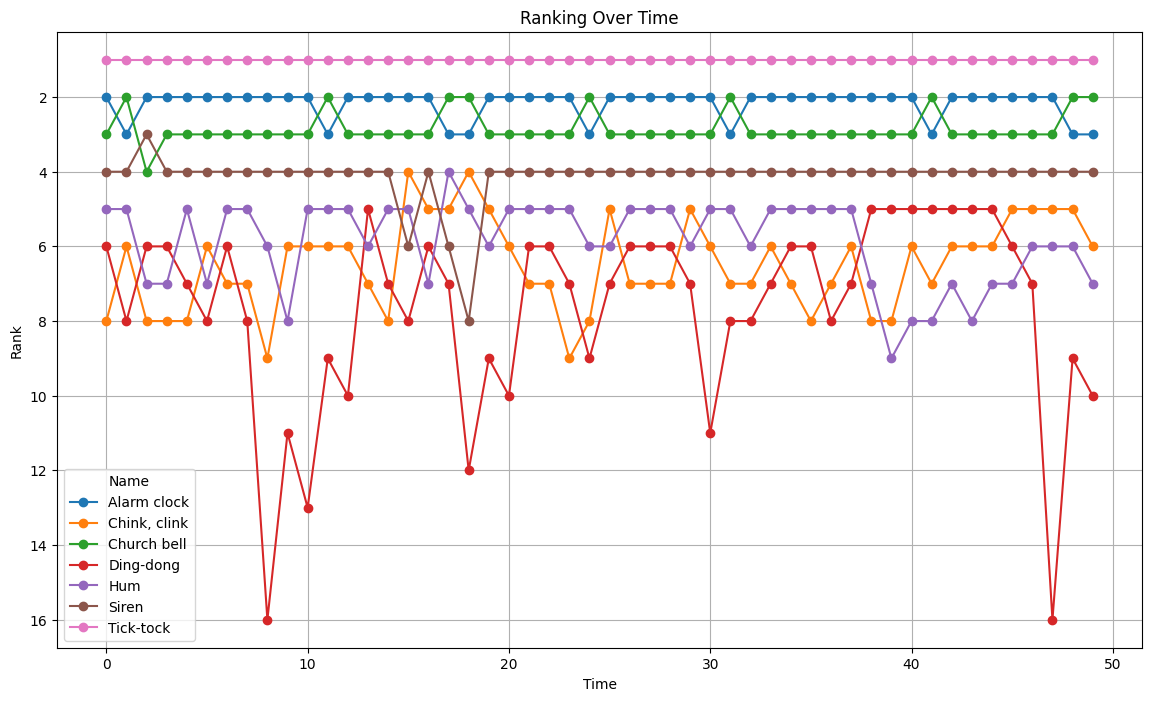

In [315]:
all_data = pd.concat([df.assign(Time=i) for i, df in enumerate(dataframes)], ignore_index=True)

# Calculate rankings
all_data['Rank'] = all_data.groupby('Time')['similarity'].rank(ascending=False)

top_names = all_data[all_data['Rank'] <= 7]['name'].value_counts().nlargest(7).index.tolist()
filtered_data = all_data[all_data['name'].isin(top_names)]
pivot_data = filtered_data.pivot(index='Time', columns='name', values='Rank')

# Plot
plt.figure(figsize=(14, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column, marker='o')
plt.gca().invert_yaxis() 
plt.title('Ranking Over Time')
plt.xlabel('Time')
plt.ylabel('Rank')
plt.legend(title='Name')
plt.grid(True)
plt.show()

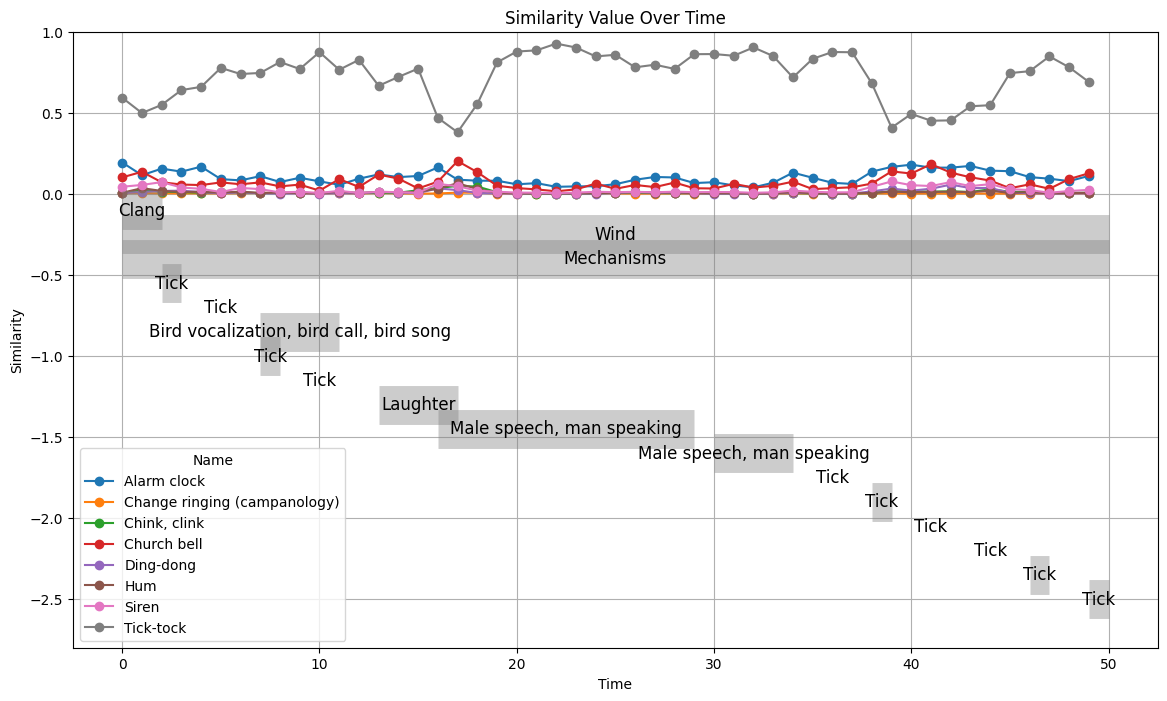

In [316]:
# Concatenate all dataframes with a new 'Time' column
all_data = pd.concat([df.assign(Time=i) for i, df in enumerate(dataframes)], ignore_index=True)

top_names = all_data.groupby('Time').apply(lambda x: x.nlargest(8, 'similarity'))['name'].value_counts().nlargest(8).index
filtered_data = all_data[all_data['name'].isin(top_names)]
pivot_data = filtered_data.pivot(index='Time', columns='name', values='similarity')
    
# Plot
plt.figure(figsize=(14, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column, marker='o')

# Plot scene
ratio = int(video.shape[0] / len(dataframes))
for scene_n, scene in enumerate(scenes):
    end_frame_scene = scene[1].frame_num
    end_frame_new = end_frame_scene / ratio
    plt.axvline(x=end_frame_new, color='red', linestyle='--', linewidth=3)
    #plt.text(end_frame_new - 5, plt.ylim()[1]-0.05, f'Scene {scene_n + 1}', verticalalignment='top', horizontalalignment='left', fontsize=12, color='red')

bar_y_position = -0.1
bar_height = 0.2
y_pos_increment = -0.15  

for i, row in labels_df.iterrows():
    start_time = row['start_time_seconds']
    start_time = int(start_time * video_fps / ratio)
    
    end_time = row['end_time_seconds']
    end_time = int(end_time * video_fps / ratio)
    label = row['name']
    
    # Adjust y position for each segment
    current_y_pos = bar_y_position + (i * y_pos_increment)

    plt.hlines(current_y_pos, start_time, end_time, colors='grey', lw=28, alpha=0.4) 

    plt.text((start_time + end_time) / 2, current_y_pos, label, ha='center', va='center', fontsize=12, color='black')

plt.ylim(top=1, bottom=current_y_pos + 2*y_pos_increment) 
plt.title('Similarity Value Over Time')
plt.xlabel('Time')
plt.ylabel('Similarity')
plt.legend(title='Name')
plt.grid(True)
plt.show()

### **Synching Algorithm**

In [317]:
### HYPERPARAMETERS
alpha = 0.1 ## Similarity threshold
gamma = 1 ## Movement threshold

# ALGORITHM
intervals = {}
for col in pivot_data.columns:
    df = pivot_data[[col]]
    
    df['valid'] = df[col] > alpha
    
    # Step 2: Identify consecutive groups
    df['group'] = (df['valid'] != df['valid'].shift()).cumsum()
    
    # Get only valid groups
    valid_groups = df[df['valid']].groupby('group')
    
    # Function to find the largest valid subinterval that includes at least two values
    def find_largest_valid_subinterval(group):
        best_interval = None
        best_length = 0
        
        # Check every possible subinterval with at least 2 values
        for start in range(len(group)):
            for end in range(start + 2, len(group) + 1):  # start from start+2 to ensure at least two values
                sub_group = group.iloc[start:end]
                avg = sub_group[col].mean()
                lower_bound = avg * (1 - gamma)
                upper_bound = avg * (1 + gamma)
                if sub_group[col].between(lower_bound, upper_bound).all():
                    if (end - start) > best_length:
                        best_length = end - start
                        best_interval = (sub_group.index.min(), sub_group.index.max())
        
        return best_interval
    
    
    #intervals = []
    for name, group in valid_groups:
        interval = find_largest_valid_subinterval(group)
        if interval:
            try:
                intervals[col].append(interval)
            except KeyError:
                intervals[col] = []
                intervals[col].append(interval)

In [318]:
intervals

{'Alarm clock': [(0, 4), (13, 16), (27, 28), (38, 46)],
 'Church bell': [(0, 1), (17, 18), (39, 43)],
 'Tick-tock': [(0, 49)]}

In [319]:
synched_df = pd.DataFrame({'start_frame':[], 'end_frame':[], 'name':[]})
i=0
for label in intervals:
    print(label)
    for sync in intervals[label]:
        synched_df.loc[i] = [sync[0], sync[1], label]
        i+=1

synched_df

Alarm clock
Church bell
Tick-tock


start_frame  end_frame         name
0            0          4  Alarm clock
1           13         16  Alarm clock
2           27         28  Alarm clock
3           38         46  Alarm clock
4            0          1  Church bell
5           17         18  Church bell
6           39         43  Church bell
7            0         49    Tick-tock

In [ ]:
# Concatenate all dataframes with a new 'Time' column
all_data = pd.concat([df.assign(Time=i) for i, df in enumerate(dataframes)], ignore_index=True)

top_names = all_data.groupby('Time').apply(lambda x: x.nlargest(8, 'similarity'))['name'].value_counts().nlargest(8).index
filtered_data = all_data[all_data['name'].isin(top_names)]
pivot_data = filtered_data.pivot(index='Time', columns='name', values='similarity')

x_max = len(pivot_data)
x_min = 0

# Plot
fig, ax = plt.subplots(3, 1, figsize=(14, 13), dpi=150)
for column in pivot_data.columns:
    ax[0].plot(pivot_data.index, pivot_data[column], label=column, marker='o')

# Plot scene
ratio = int(video.shape[0] / len(dataframes))
for scene_n, scene in enumerate(scenes):
    end_frame_scene = scene[1].frame_num
    end_frame_new = end_frame_scene / ratio
    ax[0].axvline(x=end_frame_new, color='red', linestyle='--', linewidth=3)

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Similarity')
ax[0].set_title('Similarity over time', fontsize=15)
ax[0].legend(title='Name', loc='upper right', bbox_to_anchor=(1.3, 1))
ax[0].grid(True)
ax[0].set_xlim(x_min, x_max)

### Synched Segments
bar_y_position = 1 # current_y_pos + 2*y_pos_increment
bar_height = 0.2
y_pos_increment = -0.15  

for i, row in synched_df.iterrows():
    start_time = row['start_frame']
    end_time = row['end_frame']
    label = row['name']
    # Adjust y position for each segment
    current_y_pos = bar_y_position + (i * y_pos_increment)
    ax[1].hlines(current_y_pos, start_time, end_time, colors='green', lw=28, alpha=0.4) 
    ax[1].text((start_time + end_time) / 2, current_y_pos, label, ha='center', va='center', fontsize=12, color='black')
ax[1].yaxis.set_visible(False)
ax[1].set_title('Auto-Synched Audio Segments', fontsize=15)
ax[1].grid(True, alpha=0.3)
# Plot scene
for scene_n, scene in enumerate(scenes):
    end_frame_scene = scene[1].frame_num
    end_frame_new = end_frame_scene / ratio
    ax[1].axvline(x=end_frame_new, color='red', linestyle='--', linewidth=3)
ax[1].set_xlim(x_min, x_max)

### Original Labels
bar_y_position = -0.1
bar_height = 0.2
y_pos_increment = -0.15  

for i, row in labels_df.iterrows():
    start_time = row['start_time_seconds']
    start_time = int(start_time * video_fps / ratio)
    end_time = row['end_time_seconds']
    end_time = int(end_time * video_fps / ratio)
    label = row['name']
    # Adjust y position for each segment
    current_y_pos = bar_y_position + (i * y_pos_increment)
    ax[2].hlines(current_y_pos, start_time, end_time, colors='grey', lw=28, alpha=0.4) 
    ax[2].text((start_time + end_time) / 2, current_y_pos, label, ha='center', va='center', fontsize=12, color='black')

ax[2].yaxis.set_visible(False)
ax[2].set_title('Original Labels', fontsize=15)
ax[2].grid(True, alpha=0.3)
# Plot scene
for scene_n, scene in enumerate(scenes):
    end_frame_scene = scene[1].frame_num
    end_frame_new = end_frame_scene / ratio
    ax[2].axvline(x=end_frame_new, color='red', linestyle='--', linewidth=3)
ax[2].set_xlim(x_min, x_max)

#plt.ylim(top=1, bottom=current_y_pos + 2*y_pos_increment) 
plt.tight_layout()
plt.show()

# **Hyperparameters search**

In [275]:
### HYPERPARAMETERS
alpha = 0.1 ## Similarity threshold
gamma = 1 ## Movement threshold

def autosync(pivot_data, alpha, gamma):
    intervals = {}
    
    for col in pivot_data.columns:
        # For each sound
        
        df = pivot_data[[col]]
        df['valid'] = df[col] > alpha
        
        # Identify consecutive groups
        df['group'] = (df['valid'] != df['valid'].shift()).cumsum()
        
        # Get only valid groups
        valid_groups = df[df['valid']].groupby('group')
        def find_largest_valid_subinterval(group):
            """ 
            Function to find the largest valid subinterval that includes at least two values
            """
                
            best_interval = None
            best_length = 0
            
            # Check every possible subinterval with at least 2 values
            for start in range(len(group)):
                for end in range(start + 2, len(group) + 1):  # start from start+2 to ensure at least two values
                    sub_group = group.iloc[start:end]
                    avg = sub_group[col].mean()
                    lower_bound = avg * (1 - gamma)
                    upper_bound = avg * (1 + gamma)
                    if sub_group[col].between(lower_bound, upper_bound).all():
                        if (end - start) > best_length:
                            best_length = end - start
                            best_interval = (sub_group.index.min(), sub_group.index.max())
            
            return best_interval
        
        #intervals = []
        for name, group in valid_groups:
            interval = find_largest_valid_subinterval(group)
            if interval:
                try:
                    intervals[col].append(interval)
                except KeyError:
                    intervals[col] = []
                    intervals[col].append(interval)
        
    return intervals

In [127]:
autosync(pivot_data, 0.1, 1)

{'Bang': [(27, 28)],
 'Clip-clop': [(0, 2), (18, 22)],
 'Light engine (high frequency)': [(23, 25), (27, 49)],
 'Meow': [(9, 10)]}

In [76]:
text_embeddings.shape

torch.Size([632, 1024])

In [170]:
# Compute text embeddings
## Done above

# Evaluation loop
record = {
    'Alpha': [],
    'Gamma': [],
    'Video ID': [],
    'Length Loss': [],
    'Inaccuracy Loss': [],
    'Sync Loss': [],
    'Loss': [],
    'Intervals': []
}

minimum_loss = 2000000000
iteration = 0
# For loop ALPHA, GAMMA
for alpha in [0.05, 0.1, 0.2, 0.3]:
    for gamma in [0.2, 0.6, 1]:
        total_loss = 0
        for iter in range(10):
            iteration +=1
            print(f"Iteration {iteration}")
            record['Alpha'].append(alpha)
            record['Gamma'].append(gamma)

            video_id = np.random.randint(28000)
            record['Video ID'].append(video_id)

            # Get video datapoint
            video, _, labels_df, info = dataset[video_id]
            video_fps = info['video_fps']
            labels_df = pd.merge(labels_df, ontology, how='left', left_on='label', right_on='id')
            
            # Compute video embeddings
            interval_seconds = 0.2
            video_fps = info['video_fps']
            seconds = video.shape[0] / video_fps
            number_of_segments = int(seconds / interval_seconds)
            
            video = video.permute(0, 2, 3, 1)
            scaled_video = transform_and_sample_video_tensor(video, device, clips_per_video = number_of_segments)
            
            inputs = {
                ModalityType.VISION: scaled_video,
            }
            
            with torch.no_grad():
                outputs = model(inputs)
                
            video_embeddings = outputs['vision']
            
            
            # Compute similarity and process output
            product = video_embeddings @ text_embeddings.T
            
            TYPE = 'SFX'
            dataframes = []
            for segment in range(product.shape[0]):
                match_ont_df = ontology.copy()
                # Compute Softmax at MajorityType granularity
                match_ont_df['product'] = product[segment].cpu().numpy()
                match_ont_df = match_ont_df[match_ont_df['MajorityType'] == TYPE]
                match_ont_df['similarity'] = F.softmax(torch.tensor(match_ont_df['product'].tolist()))
            
                match_ont_df = match_ont_df.sort_values('similarity', ascending=False)
                dataframes.append(match_ont_df)
            
            # Concatenate all dataframes with a new 'Time' column
            all_data = pd.concat([df.assign(Time=i) for i, df in enumerate(dataframes)], ignore_index=True)
            
            top_names = all_data.groupby('Time').apply(lambda x: x.nlargest(8, 'similarity'))['name'].value_counts().nlargest(8).index
            filtered_data = all_data[all_data['name'].isin(top_names)]
            pivot_data = filtered_data.pivot(index='Time', columns='name', values='similarity')
            
            # Find intervals -- AUTOSYNC
            intervals = autosync(pivot_data, alpha, gamma)
            
            # process
            synched_df = pd.DataFrame({'start_frame':[], 'end_frame':[], 'name':[]})
            i=0
            for label in intervals:
                for sync in intervals[label]:
                    synched_df.loc[i] = [sync[0], sync[1], label]
                    i+=1
            record['Intervals'].append(synched_df)

            # compute loss
            transformed_labels = labels_df[['start_time_seconds','end_time_seconds','name']]
            transformed_labels['start_frame'] = (transformed_labels['start_time_seconds'] * video_fps / ratio).astype(int)
            transformed_labels['end_frame'] = (transformed_labels['end_time_seconds'] * video_fps / ratio).astype(int)
            transformed_labels.drop(columns=['start_time_seconds','end_time_seconds'], inplace=True)

            length_component = np.abs(len(synched_df) - len(transformed_labels))/ len(transformed_labels)
            record['Length Loss'].append(length_component)

            intersection = [x for x in synched_df['name'].unique() if x in transformed_labels['name'].unique()]
            inaccuracy_component = 1 - len(intersection) / len(transformed_labels)
            record['Inaccuracy Loss'].append(inaccuracy_component)

            sync_component = 0
            for i, row in transformed_labels.iterrows():
                sound_name = row['name']
                min_score = find_best_match(row['start_frame'], row['end_frame'], synched_df)
                sync_component += min_score
                
            max_score = len(transformed_labels) * number_of_segments
            sync_component = sync_component / max_score
            if sync_component>1:
                # This happens when there are no matches found
                sync_component = 1
            record['Sync Loss'].append(sync_component)

            loss = length_component + inaccuracy_component + sync_component
            record['Loss'].append(loss)

            total_loss += loss
        
        if total_loss < minimum_loss:
            minimum_loss = total_loss
            best_alpha, best_gamma = alpha, gamma
            
        print(f"Alpha: {alpha} | Gamma: {gamma} | Loss: {total_loss}")

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Alpha: 0.05 | Gamma: 0.2 | Loss: 27.956119891928402
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Alpha: 0.05 | Gamma: 0.6 | Loss: 34.04815937968234
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Alpha: 0.05 | Gamma: 1 | Loss: 24.68675724637681
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Alpha: 0.1 | Gamma: 0.2 | Loss: 21.863790214711397
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Alpha: 0.1 | Gamma: 0.6 | Loss: 22.229228975448656
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
I

In [172]:
print(best_alpha)
print(best_gamma)
print(minimum_loss)

0.3
0.6
21.1529938157081


In [173]:
record_modified = {
    'Alpha': record['Alpha'],
    'Gamma': record['Gamma'],
    'Video ID': record['Video ID'],
    'Length Loss': record['Length Loss'],
    'Inaccuracy Loss': record['Inaccuracy Loss'],
    'Sync Loss': record['Sync Loss'],
    'Loss': record['Loss'],
}
record_df = pd.DataFrame(record_modified)

In [176]:
record_df.groupby(['Alpha','Gamma']).sum().sort_values('Loss', ascending=True)

Video ID  Length Loss  Inaccuracy Loss  Sync Loss       Loss
Alpha Gamma                                                              
0.30  0.6      172945     7.404545         8.800000   4.948448  21.152994
0.10  1.0      142140     9.044940         9.472222   3.195158  21.712321
      0.2      131612     8.293899         9.923077   3.646814  21.863790
      0.6      145760     8.238467         9.952381   4.038381  22.229229
0.20  0.6      127142     8.731471        10.000000   4.381563  23.113035
0.30  0.2      143598     6.895833         9.666667   7.009167  23.571667
0.20  1.0      179457     8.047619         9.702381   6.749175  24.499175
0.05  1.0      136214    11.879167        10.000000   2.807591  24.686757
0.30  1.0      133908     8.562963         9.500000   6.708444  24.771407
0.20  0.2      138192    11.800092         8.969048   4.728810  25.497949
0.05  0.2      130141    16.000794         9.255556   2.699771  27.956120
      0.6       98472    22.413642         9.846591   1.787927  34.048159

In [177]:
record_df.groupby(['Alpha','Gamma']).sum().sort_values('Sync Loss', ascending=True)

Video ID  Length Loss  Inaccuracy Loss  Sync Loss       Loss
Alpha Gamma                                                              
0.05  0.6       98472    22.413642         9.846591   1.787927  34.048159
      0.2      130141    16.000794         9.255556   2.699771  27.956120
      1.0      136214    11.879167        10.000000   2.807591  24.686757
0.10  1.0      142140     9.044940         9.472222   3.195158  21.712321
      0.2      131612     8.293899         9.923077   3.646814  21.863790
      0.6      145760     8.238467         9.952381   4.038381  22.229229
0.20  0.6      127142     8.731471        10.000000   4.381563  23.113035
      0.2      138192    11.800092         8.969048   4.728810  25.497949
0.30  0.6      172945     7.404545         8.800000   4.948448  21.152994
      1.0      133908     8.562963         9.500000   6.708444  24.771407
0.20  1.0      179457     8.047619         9.702381   6.749175  24.499175
0.30  0.2      143598     6.895833         9.666667   7.009167  23.571667

In [178]:
record_df.groupby(['Alpha','Gamma']).sum().sort_values('Inaccuracy Loss', ascending=True)

Video ID  Length Loss  Inaccuracy Loss  Sync Loss       Loss
Alpha Gamma                                                              
0.30  0.6      172945     7.404545         8.800000   4.948448  21.152994
0.20  0.2      138192    11.800092         8.969048   4.728810  25.497949
0.05  0.2      130141    16.000794         9.255556   2.699771  27.956120
0.10  1.0      142140     9.044940         9.472222   3.195158  21.712321
0.30  1.0      133908     8.562963         9.500000   6.708444  24.771407
      0.2      143598     6.895833         9.666667   7.009167  23.571667
0.20  1.0      179457     8.047619         9.702381   6.749175  24.499175
0.05  0.6       98472    22.413642         9.846591   1.787927  34.048159
0.10  0.2      131612     8.293899         9.923077   3.646814  21.863790
      0.6      145760     8.238467         9.952381   4.038381  22.229229
0.05  1.0      136214    11.879167        10.000000   2.807591  24.686757
0.20  0.6      127142     8.731471        10.000000   4.381563  23.113035

In [179]:
record_df.groupby(['Alpha','Gamma']).sum().sort_values('Length Loss', ascending=True)

Video ID  Length Loss  Inaccuracy Loss  Sync Loss       Loss
Alpha Gamma                                                              
0.30  0.2      143598     6.895833         9.666667   7.009167  23.571667
      0.6      172945     7.404545         8.800000   4.948448  21.152994
0.20  1.0      179457     8.047619         9.702381   6.749175  24.499175
0.10  0.6      145760     8.238467         9.952381   4.038381  22.229229
      0.2      131612     8.293899         9.923077   3.646814  21.863790
0.30  1.0      133908     8.562963         9.500000   6.708444  24.771407
0.20  0.6      127142     8.731471        10.000000   4.381563  23.113035
0.10  1.0      142140     9.044940         9.472222   3.195158  21.712321
0.20  0.2      138192    11.800092         8.969048   4.728810  25.497949
0.05  1.0      136214    11.879167        10.000000   2.807591  24.686757
      0.2      130141    16.000794         9.255556   2.699771  27.956120
      0.6       98472    22.413642         9.846591   1.787927  34.048159